In [2]:
# To ignore the warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [38]:
# Count the number of images in the respective classes 

ROOT_DIR = "D:\Jupyter\Projects\Brain Tumor Detector\dataset"

num_of_images = {}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'Brain Tumor': 155, 'Healthy': 98}

# We will split our data such that we have

* 70% for Train Data 
* 15% for Validation 
* 15% for Testing 

In [39]:
# Create a Training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(70/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      #os.remove(O)
else:
  print("Train Folder already exists")

Train Folder already exists


In [40]:
# Create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      #os.remove(O)
else:
  print("Validation Folder already exists")

Validation Folder already exists


In [41]:
# Create a Test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      #os.remove(O)
else:
  print("Test Folder already exists")

Test Folder already exists


In [7]:
# Import Libraries required to build our model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [43]:
# Build CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

In [44]:
# Compile the model

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)      

In [46]:
# Perform Data Augmentation

train_datagen = image.ImageDataGenerator(
     zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [47]:
train_data = train_datagen.flow_from_directory(directory= "D:/Jupyter/Projects/Brain Tumor Detector/train", target_size=(224,224), batch_size=32, 
                                               class_mode = 'binary')

Found 166 images belonging to 2 classes.


In [48]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [49]:
val_data = val_datagen.flow_from_directory(directory= "D:/Jupyter/Projects/Brain Tumor Detector/val", target_size=(224,224), batch_size=32,
                                  class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [50]:
test_data = test_datagen.flow_from_directory(directory= "D:/Jupyter/Projects/Brain Tumor Detector/test", target_size=(224,224), batch_size=32,
                                  class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [51]:
# Early stopping and Model check point 

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [52]:
training = model.fit(train_data , 
                              steps_per_epoch= 6 , 
                              epochs= 10 , verbose= 1, 
                              validation_data= val_data , 
                              validation_steps= 8,
                              callbacks = call_back)

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.4699WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 8 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.85185, saving model to best_model.h5
6/6 [==============================] - 10s 2s/step - loss: 1.0953 - accuracy: 0.4699 - val_loss: 0.6614 - val_accuracy: 0.8519
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.6928WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 8 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: val_accuracy did not improve from 0.85185
6/6 [============

In [4]:
# Loading the best fit model 
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


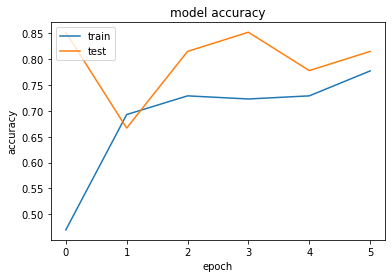

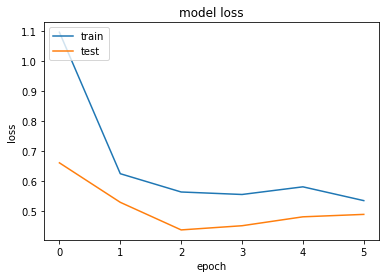

In [59]:
# Plot accuracy and loss

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# checking out the accuracy of our model 

acc = model.evaluate(test_data)[1]

print(f"The accuracy of your model is = {acc*100} %")

NameError: name 'test_data' is not defined

The MRI image is of Healthy brain


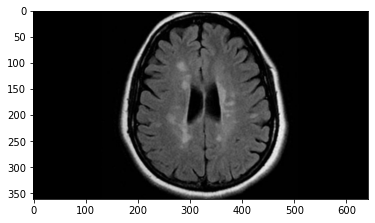

In [11]:
# path for the image to see if it predicts correct class

path = "D:/Jupyter/Projects/Brain Tumor Detector/Images to test/no 8.jpg"
img = image.load_img(path, target_size=(224,224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = model.predict_classes(input_arr)[0][0] 



if pred == 0:
  print("The MRI image is of BRAIN TUMOR")
else:
  print("The MRI image is of Healthy brain")

import matplotlib.image as mpimg
img=mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()